# Apply convolutional neural network for the same image classification dataset and compare DNN and CNN in terms of parameters and performance

In [ ]:
!pip install Kaggle
!pip install opendatasets
import opendatasets as od
import pandas
od.download(
    "https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset/data",force=True)

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     ---------                                20.5/82.7 kB ? eta -:--:--
     --------------                          30.7/82.7 kB 65.6 kB/s eta 0:00:01
     --------------                          30.7/82.7 kB 65.6 kB/s eta 0:00:01
     --------------                          30.7/82.7 kB 65.6 kB/s eta 0:00:01
     --------------                          30.7/82.7 kB 65.6 kB/s eta 0:00:01
     --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 2.1.1 requires sentencepiece, which is not installed.


Defaulting to user installation because normal site-packages is not writeable
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: chirravurivenkatalalithatejaswi@gmail.com
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/prakharrastogi534/bean-leaf-dataset


100%|████████████████████████████████████████████████████████████████████████████████| 172M/172M [18:00<00:00, 167kB/s]


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\train\train'
validation_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\validation\validation'
test_dir=r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\test\test'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)

Found 1034 images belonging to 3 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir, target_size=(150, 150), batch_size=32, class_mode='sparse'
)

Found 133 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='sparse', shuffle=False
)


Found 128 images belonging to 3 classes.


In [ ]:
class_names = list(test_generator.class_indices.keys())
class_names

['angular_leaf_spot', 'bean_rust', 'healthy']

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(150, 150, 3)),  # Flatten the input (150, 150, 3) to 150*150*3 = 67500
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,

)

Epoch 1/5


33/33 [==============================] - 21s 613ms/step - loss: 16.0199 - accuracy: 0.3308 - val_loss: 2.6759 - val_accuracy: 0.4361
Epoch 2/5
33/33 [==============================] - 20s 600ms/step - loss: 3.4819 - accuracy: 0.3810 - val_loss: 1.5155 - val_accuracy: 0.4361
Epoch 3/5
33/33 [==============================] - 20s 601ms/step - loss: 1.3703 - accuracy: 0.4894 - val_loss: 0.9857 - val_accuracy: 0.5865
Epoch 4/5
33/33 [==============================] - 21s 633ms/step - loss: 1.6361 - accuracy: 0.4768 - val_loss: 1.4869 - val_accuracy: 0.5489
Epoch 5/5
33/33 [==============================] - 19s 577ms/step - loss: 1.4629 - accuracy: 0.4720 - val_loss: 1.5065 - val_accuracy: 0.4436


In [ ]:
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 1s 179ms/step - loss: 1.6507 - accuracy: 0.3516
Test accuracy: 0.3515625


In [ ]:
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)

5/5 [==============================] - 1s 118ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=class_names))

                   precision    recall  f1-score   support

angular_leaf_spot       1.00      0.02      0.05        43
        bean_rust       0.34      0.95      0.50        43
          healthy       0.60      0.07      0.13        42

         accuracy                           0.35       128
        macro avg       0.65      0.35      0.22       128
     weighted avg       0.65      0.35      0.22       128



In [ ]:
CNN_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])


Visualize the Feature Map

In [ ]:
from tensorflow.keras.models import Model

# Specify the layers to visualize
layer_names = [
    'conv2d',  # 1st Conv Layer
    'max_pooling2d',  # 1st MaxPooling Layer
    'conv2d_1',  # 2nd Conv Layer
    'max_pooling2d_1',  # 2nd MaxPooling Layer
    'conv2d_2',  # 3rd Conv Layer
    'max_pooling2d_2',  # 3rd MaxPooling Layer
    'conv2d_3',  # 4th Conv Layer
    'max_pooling2d_3'  # 4th MaxPooling Layer
]

# Create a new model that outputs the feature maps
layer_outputs = [CNN_model.get_layer(name).output for name in layer_names]
feature_map_model = Model(inputs=CNN_model.input, outputs=layer_outputs)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = r'C:\Users\User\Documents\Jupyternotebookprgs\bean-leaf-dataset\train\train\angular_leaf_spot\angular_leaf_spot_train.0.jpg'  # Update this path
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image


In [ ]:
feature_maps = feature_map_model.predict(img_array)


1/1 [==============================] - 0s 94ms/step


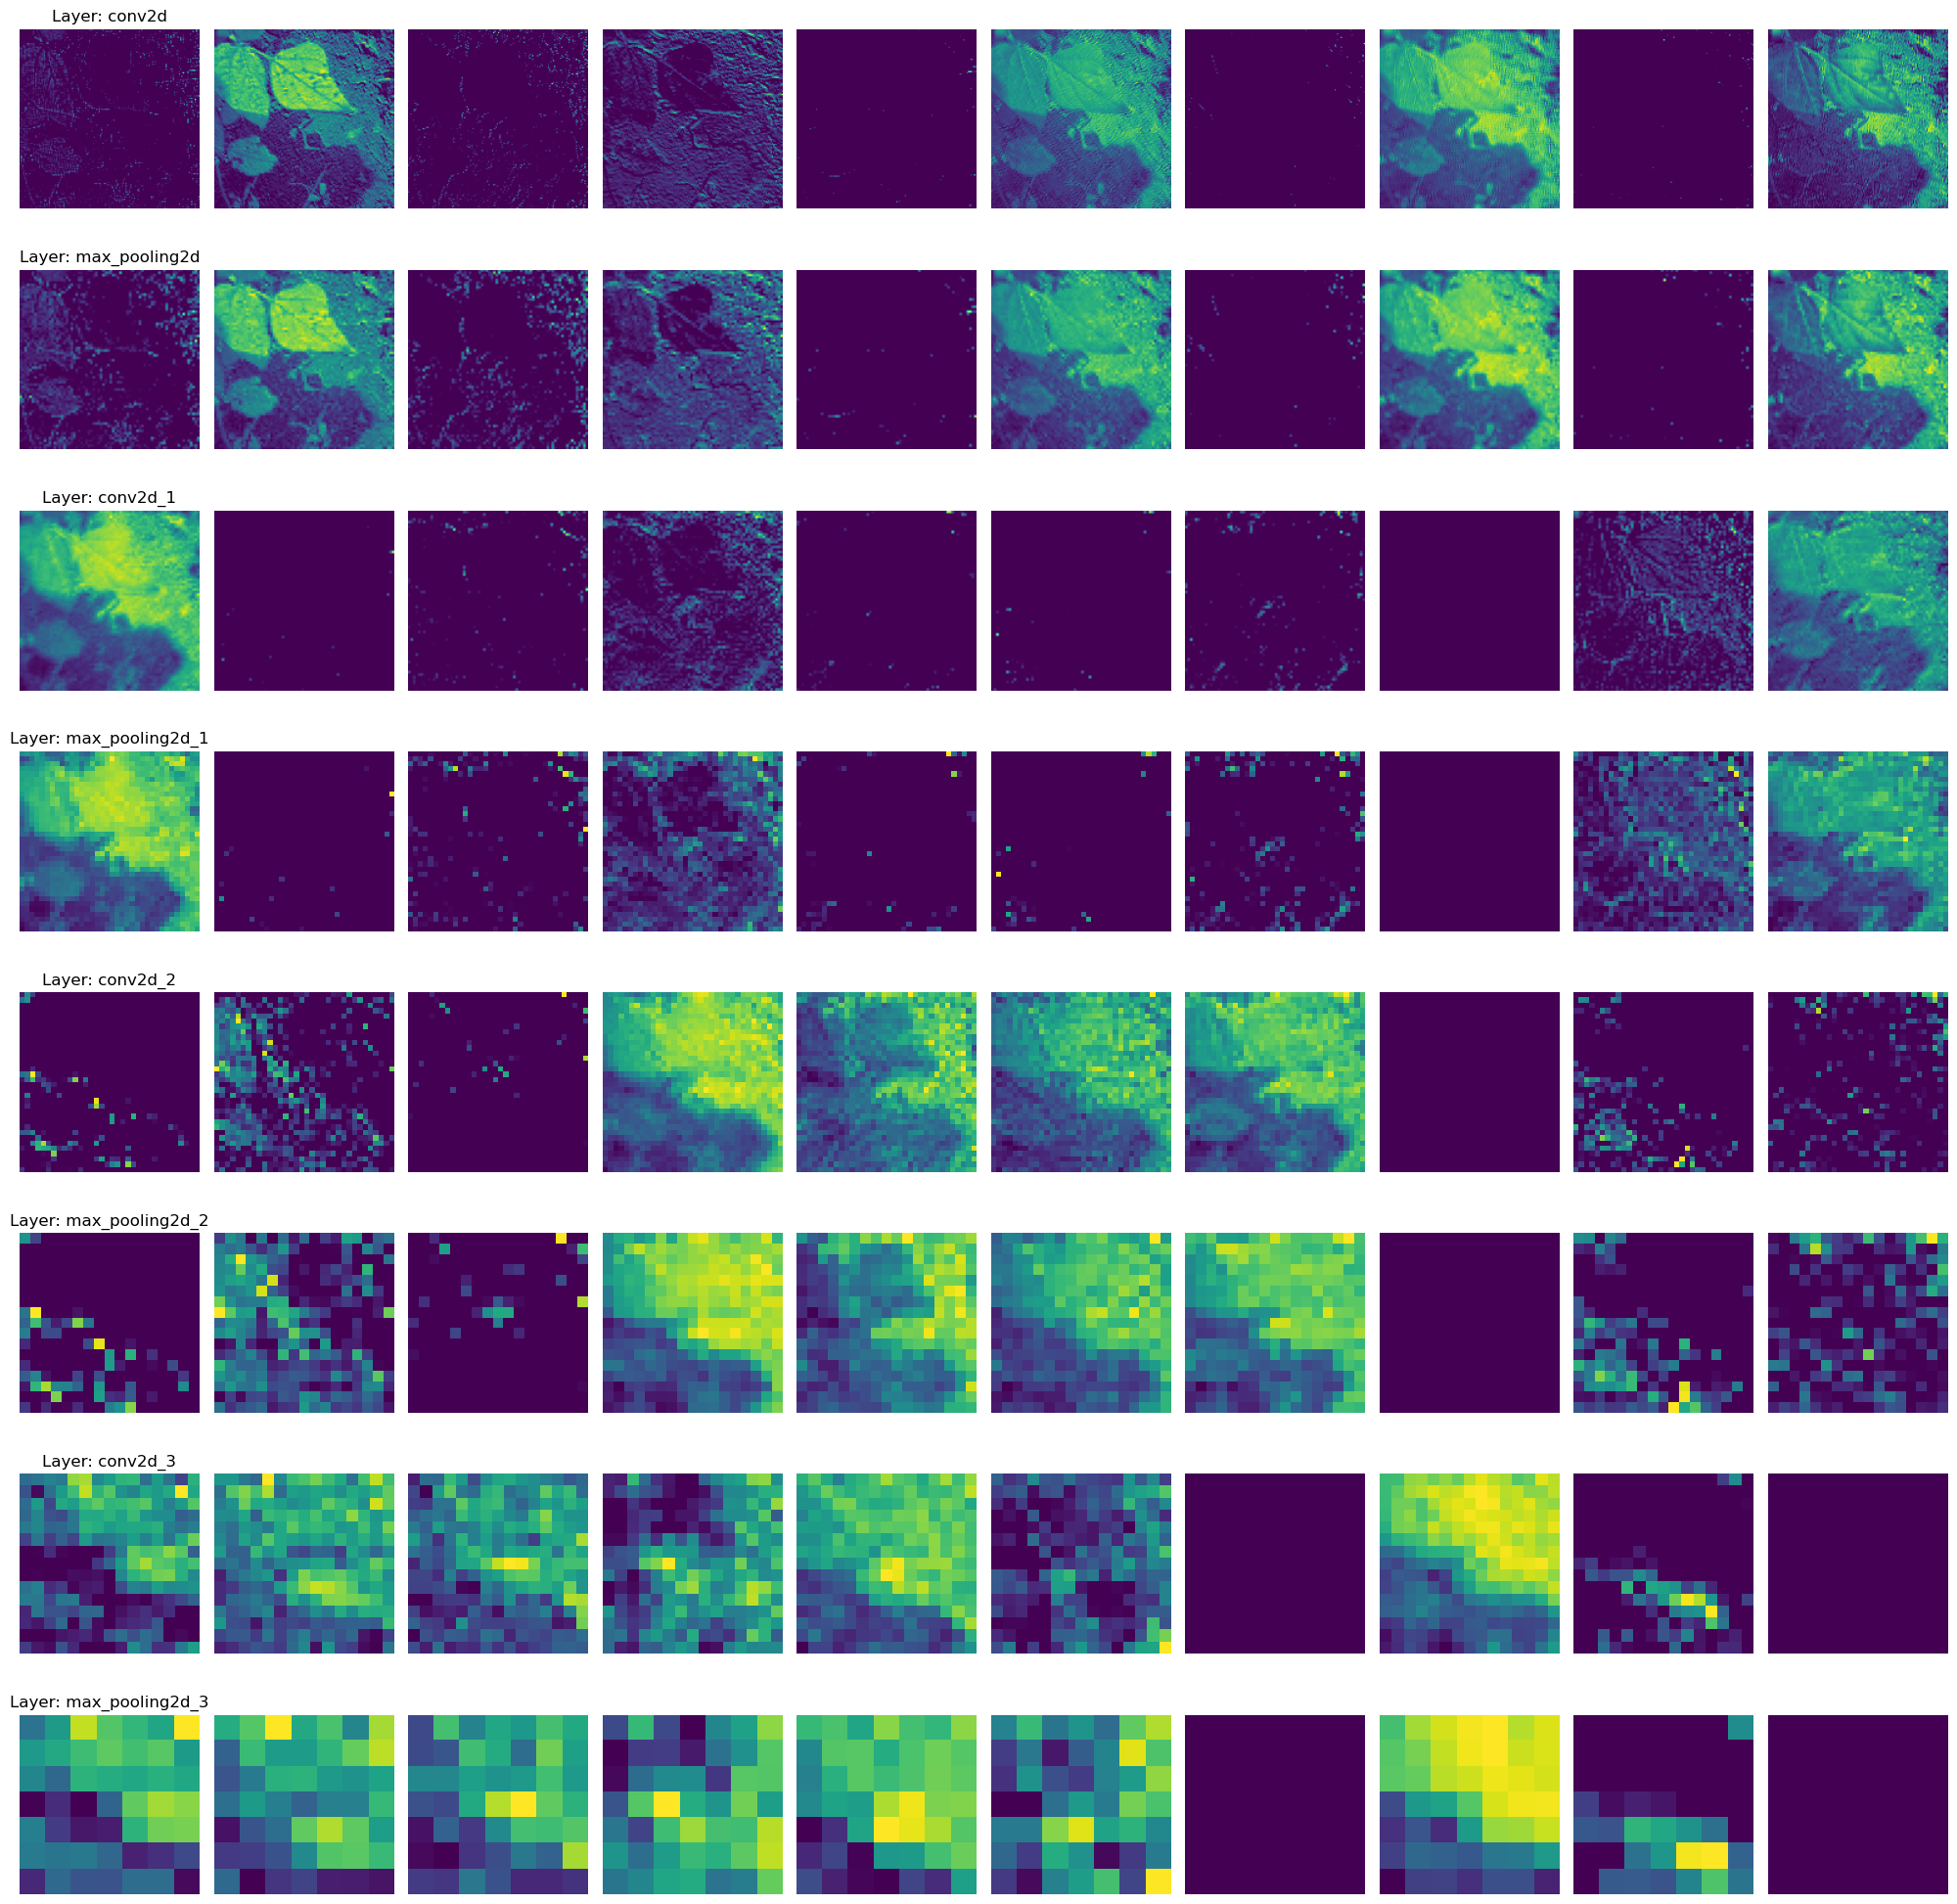

In [ ]:
import matplotlib.pyplot as plt

def plot_feature_maps(feature_maps, layer_names):
    n_layers = len(layer_names)
    fig, axes = plt.subplots(n_layers, 10, figsize=(20, 20))

    for i, layer_name in enumerate(layer_names):
        fmap = feature_maps[i]
        n_features = fmap.shape[-1]
        for j in range(min(n_features, 10)):
            ax = axes[i, j]
            ax.imshow(fmap[0, :, :, j], cmap='viridis')
            ax.axis('off')
        axes[i, 0].set_title(f'Layer: {layer_name}')

    plt.tight_layout()
    plt.show()

plot_feature_maps(feature_maps, layer_names)


In [ ]:
CNN_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
CNN_history = CNN_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,

)

Epoch 1/5
33/33 [==============================] - 23s 669ms/step - loss: 1.0795 - accuracy: 0.4323 - val_loss: 0.9671 - val_accuracy: 0.6692
Epoch 2/5
33/33 [==============================] - 23s 673ms/step - loss: 0.9955 - accuracy: 0.5116 - val_loss: 0.9380 - val_accuracy: 0.5789
Epoch 3/5
33/33 [==============================] - 25s 758ms/step - loss: 0.9063 - accuracy: 0.5957 - val_loss: 0.7900 - val_accuracy: 0.6767
Epoch 4/5
33/33 [==============================] - 26s 783ms/step - loss: 0.8919 - accuracy: 0.5716 - val_loss: 0.7967 - val_accuracy: 0.5789
Epoch 5/5
33/33 [==============================] - 26s 778ms/step - loss: 0.8062 - accuracy: 0.6480 - val_loss: 0.6643 - val_accuracy: 0.7293


In [ ]:
test_loss, test_acc = CNN_model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test accuracy: {test_acc}')

4/4 [==============================] - 1s 186ms/step - loss: 0.6988 - accuracy: 0.7578
Test accuracy: 0.7578125


In [ ]:
CNN_Y_pred = CNN_model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
CNN_y_pred = np.argmax(CNN_Y_pred, axis=1)


5/5 [==============================] - 1s 137ms/step


In [ ]:
y_true = test_generator.classes


In [ ]:
print(classification_report(y_true, CNN_y_pred , target_names=class_names))


                   precision    recall  f1-score   support

angular_leaf_spot       0.85      0.77      0.80        43
        bean_rust       0.69      0.72      0.70        43
          healthy       0.75      0.79      0.77        42

         accuracy                           0.76       128
        macro avg       0.76      0.76      0.76       128
     weighted avg       0.76      0.76      0.76       128



In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

[[33  5  5]
 [ 6 31  6]
 [ 0  9 33]]


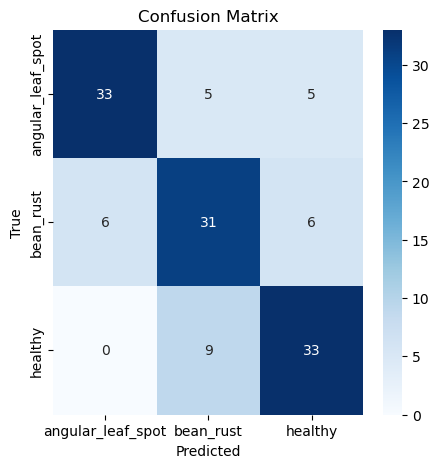

In [ ]:
plot_confusion_matrix(y_true, CNN_y_pred, class_names)


In [ ]:
def plot_training_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

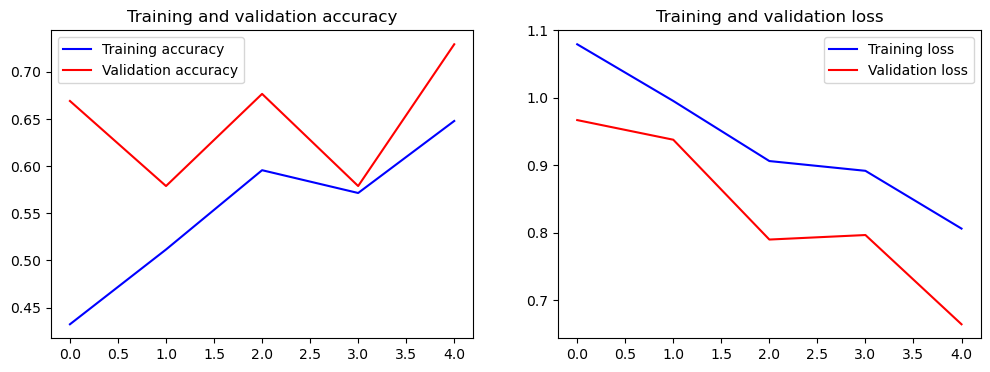

In [ ]:
plot_training_history(CNN_history)

In [ ]:
def plot_predictions(generator, model, class_names):
    x, y_true = next(generator)
    y_pred_prob = CNN_model.predict(x)
    y_pred = np.argmax(y_pred_prob, axis=1)

    plt.figure(figsize=(20, 10))
    for i in range(12):
        plt.subplot(3, 4, i + 1)
        plt.imshow(x[i])
        plt.title(f'True: {class_names[int(y_true[i])]}, Pred: {class_names[y_pred[i]]}\nProb: {y_pred_prob[i][y_pred[i]]:.2f}')
        plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 94ms/step


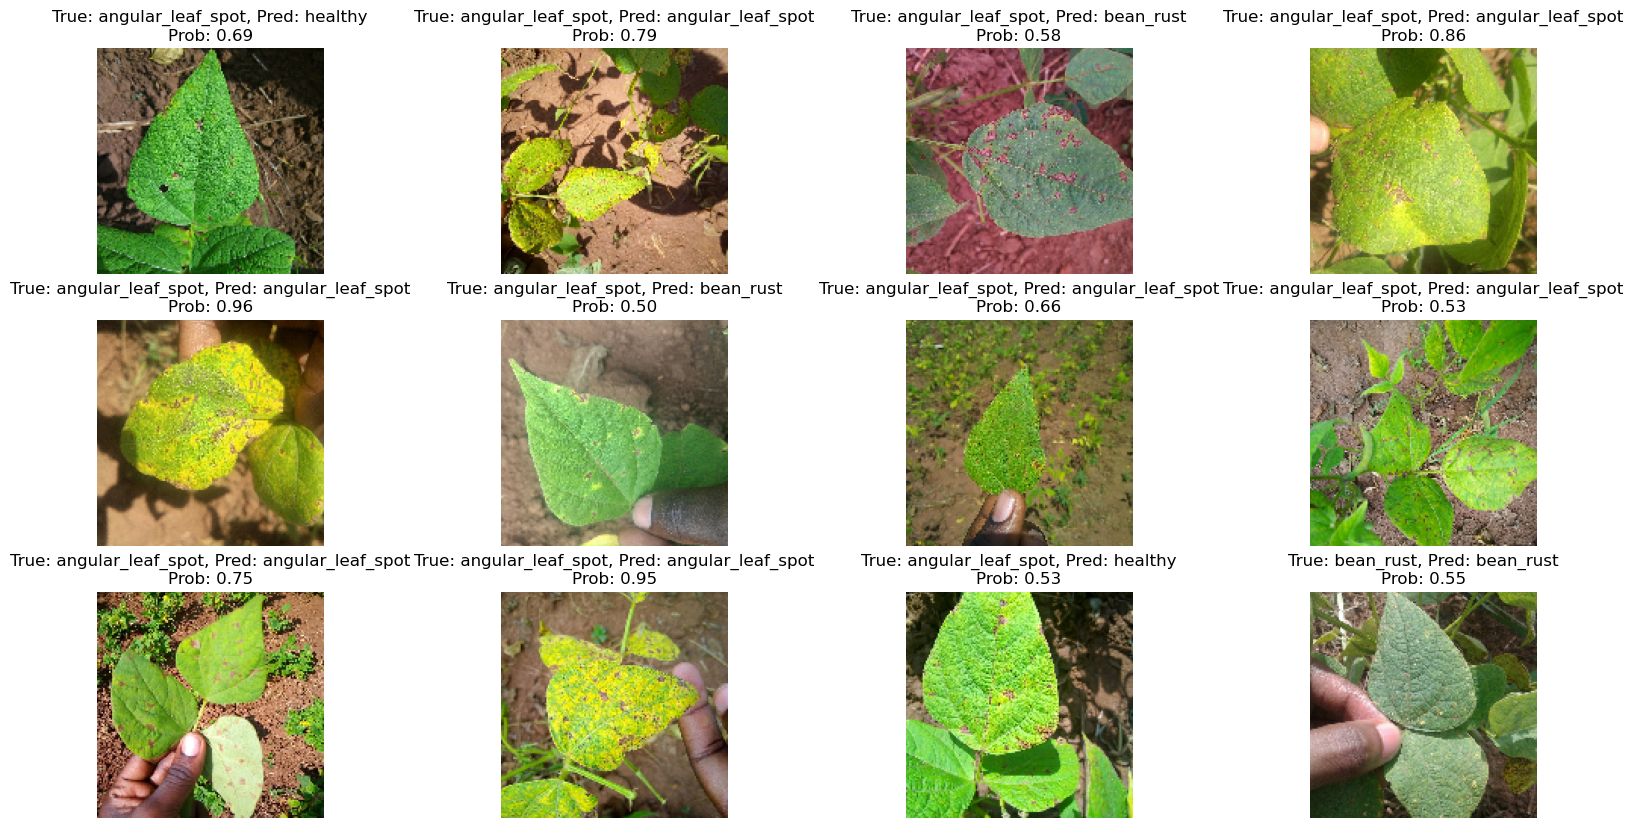

In [ ]:
plot_predictions(test_generator, CNN_model, class_names)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np


In [ ]:
precision_dnn = precision_score(y_true, y_pred, average='weighted')
recall_dnn = recall_score(y_true, y_pred, average='weighted')
f1_dnn = f1_score(y_true, y_pred, average='weighted')
accuracy_dnn = accuracy_score(y_true, y_pred)

# Calculate metrics for CNN model
precision_cnn = precision_score(y_true, CNN_y_pred, average='weighted')
recall_cnn = recall_score(y_true, CNN_y_pred, average='weighted')
f1_cnn = f1_score(y_true, CNN_y_pred, average='weighted')
accuracy_cnn = accuracy_score(y_true, CNN_y_pred)



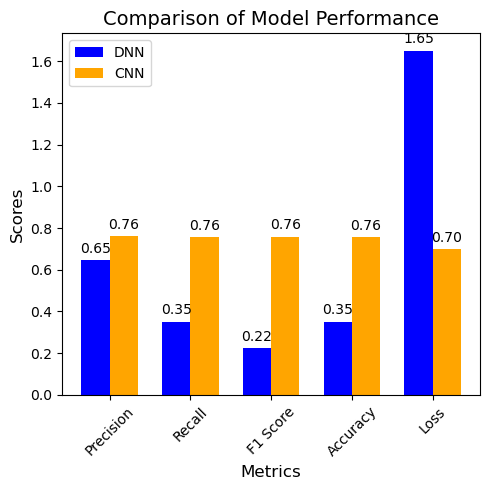

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Metrics for DNN
dnn_metrics = {
    'Precision': precision_dnn,
    'Recall': recall_dnn,
    'F1 Score': f1_dnn,
    'Accuracy': accuracy_dnn,
    'Loss': 1.6507
}

# Metrics for CNN
cnn_metrics = {
    'Precision': precision_cnn,
    'Recall': recall_cnn,
    'F1 Score': f1_cnn,
    'Accuracy': accuracy_cnn,
    'Loss': 0.6988
}

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame({
    'Metric': list(dnn_metrics.keys()) + list(cnn_metrics.keys()),
    'Value': list(dnn_metrics.values()) + list(cnn_metrics.values()),
    'Model': ['DNN']*len(dnn_metrics) + ['CNN']*len(cnn_metrics)
})

# Set up the plot
plt.figure(figsize=(5,5))

# Bar positions
x = np.arange(len(dnn_metrics))  # the label locations
width = 0.35  # the width of the bars

# Plotting bars
bars1 = plt.bar(x - width/2, list(dnn_metrics.values()), width, label='DNN', color='blue')
bars2 = plt.bar(x + width/2, list(cnn_metrics.values()), width, label='CNN', color='orange')

# Adding labels, title, and legend
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Model Performance', fontsize=14)
plt.xticks(x, list(dnn_metrics.keys()), rotation=45)
plt.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

# Display the plot
plt.tight_layout()
plt.show()
